In [20]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [21]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


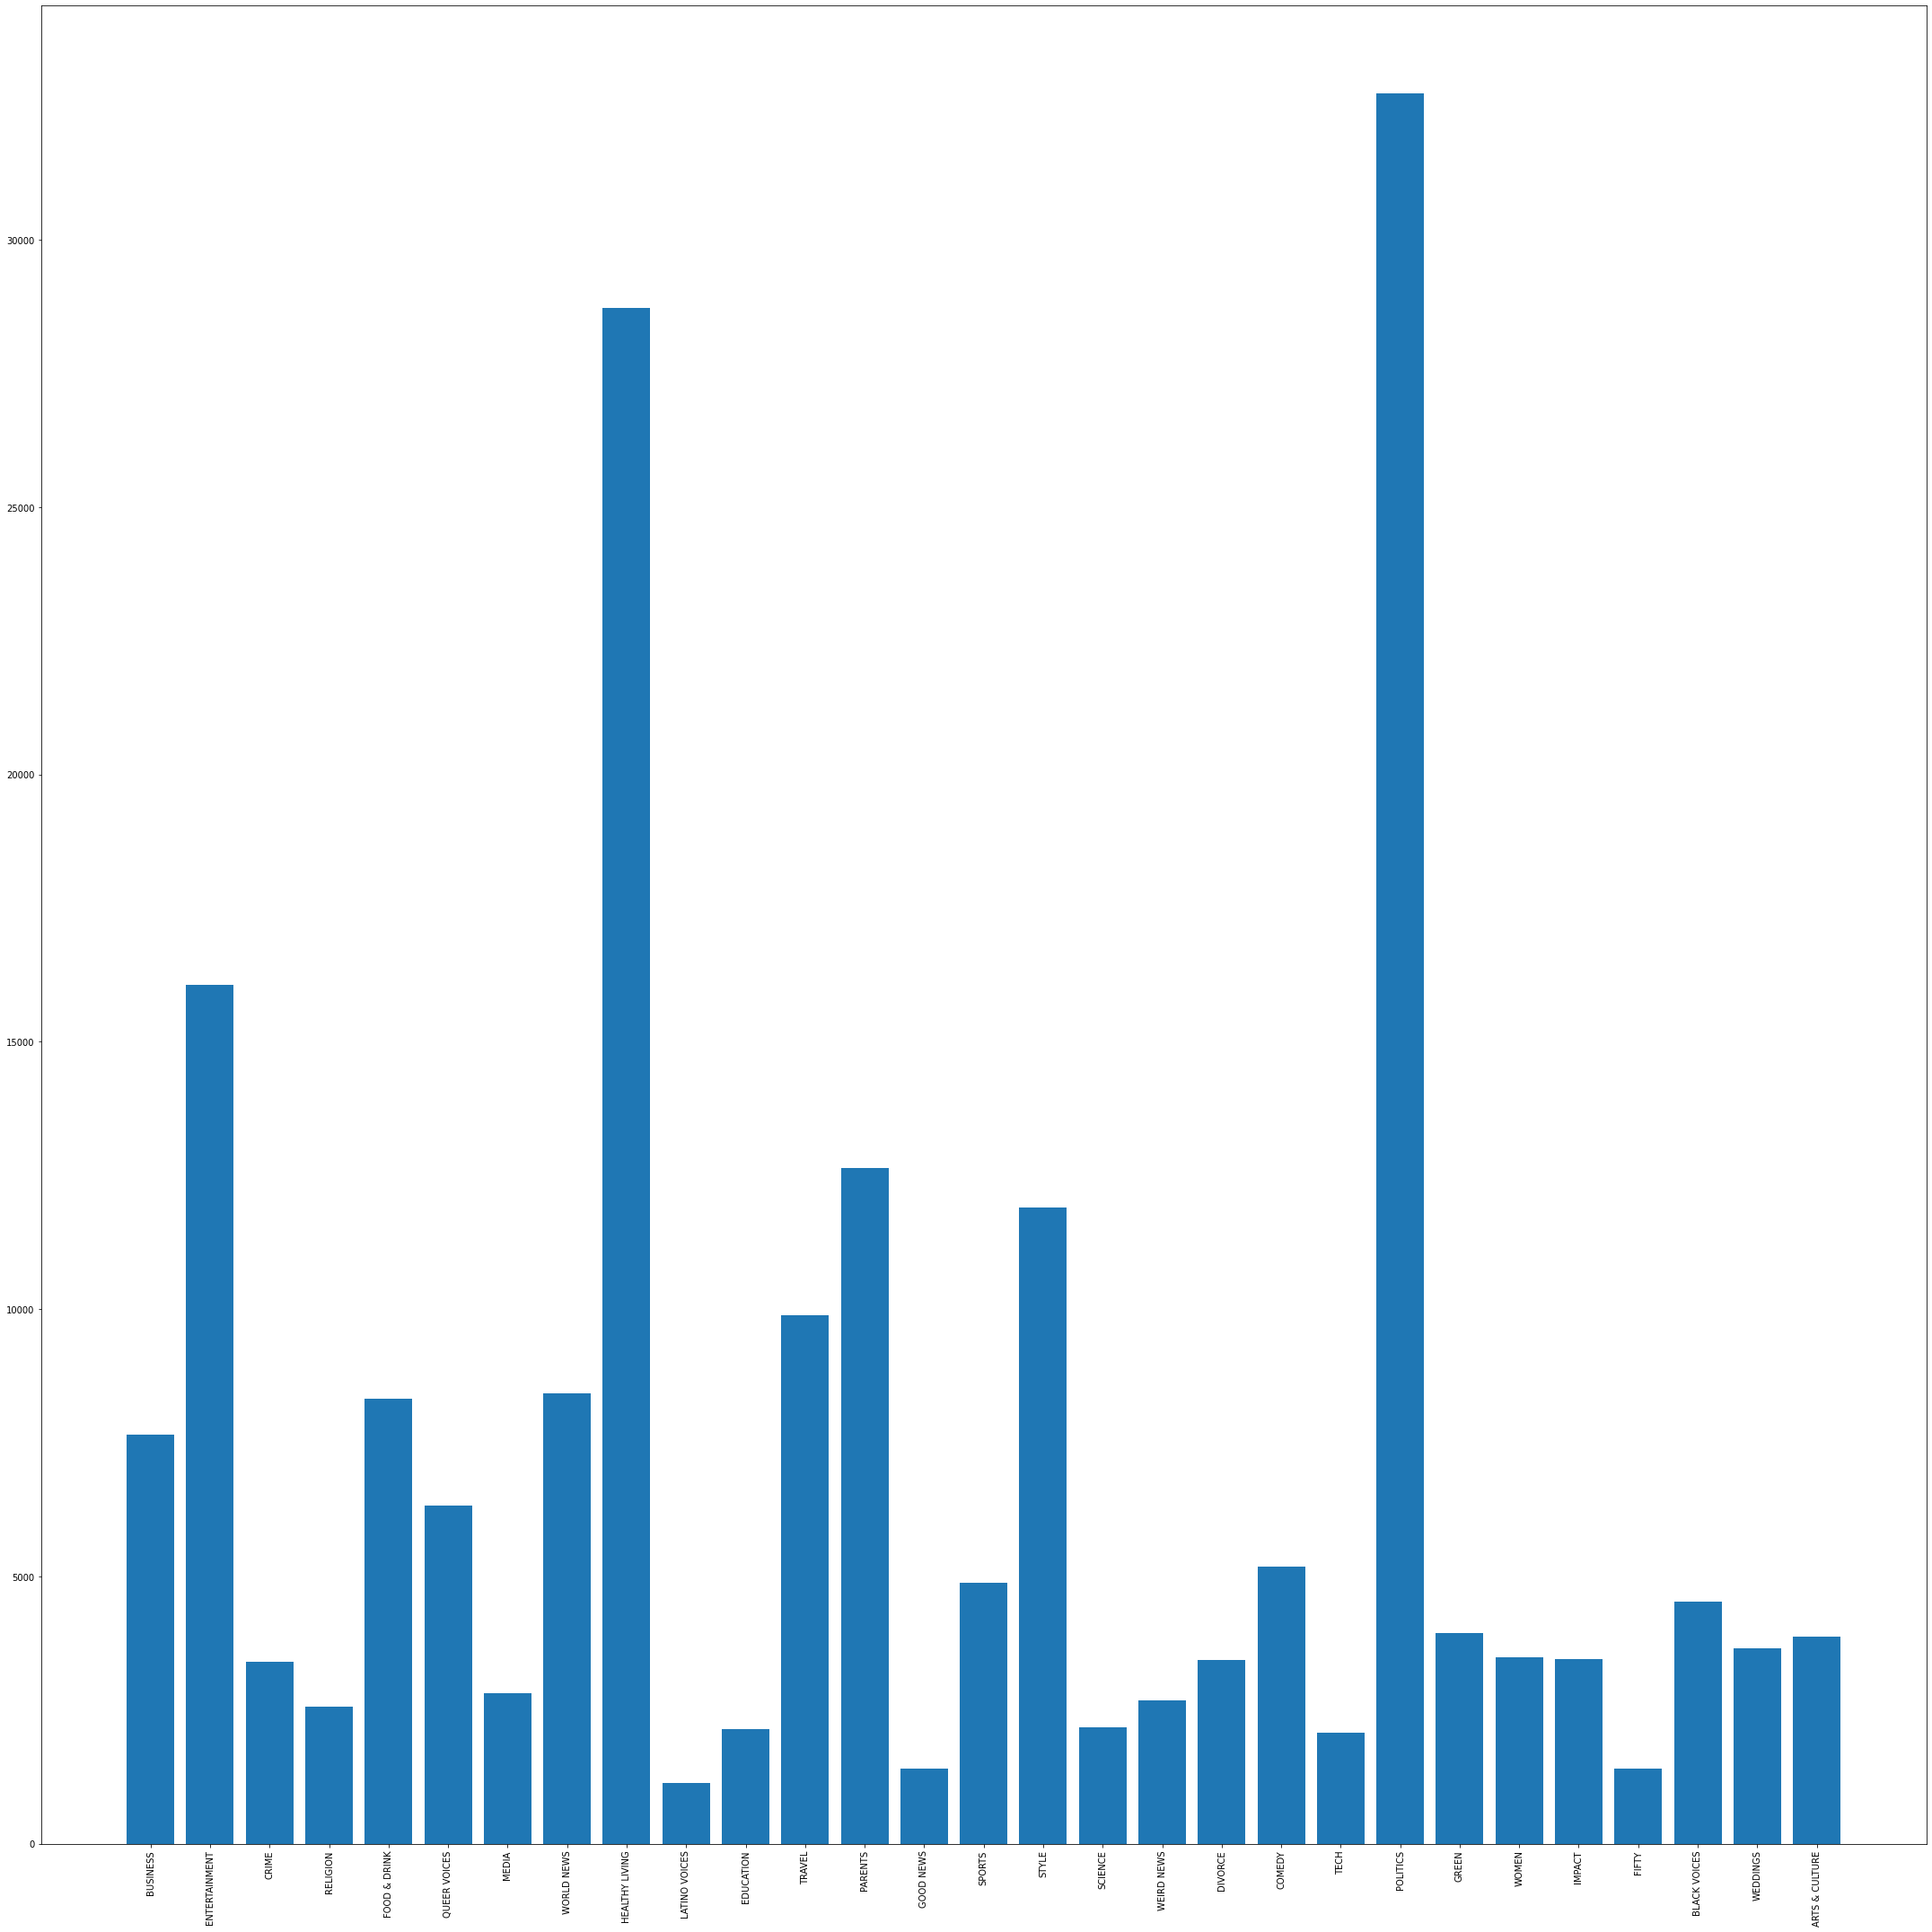

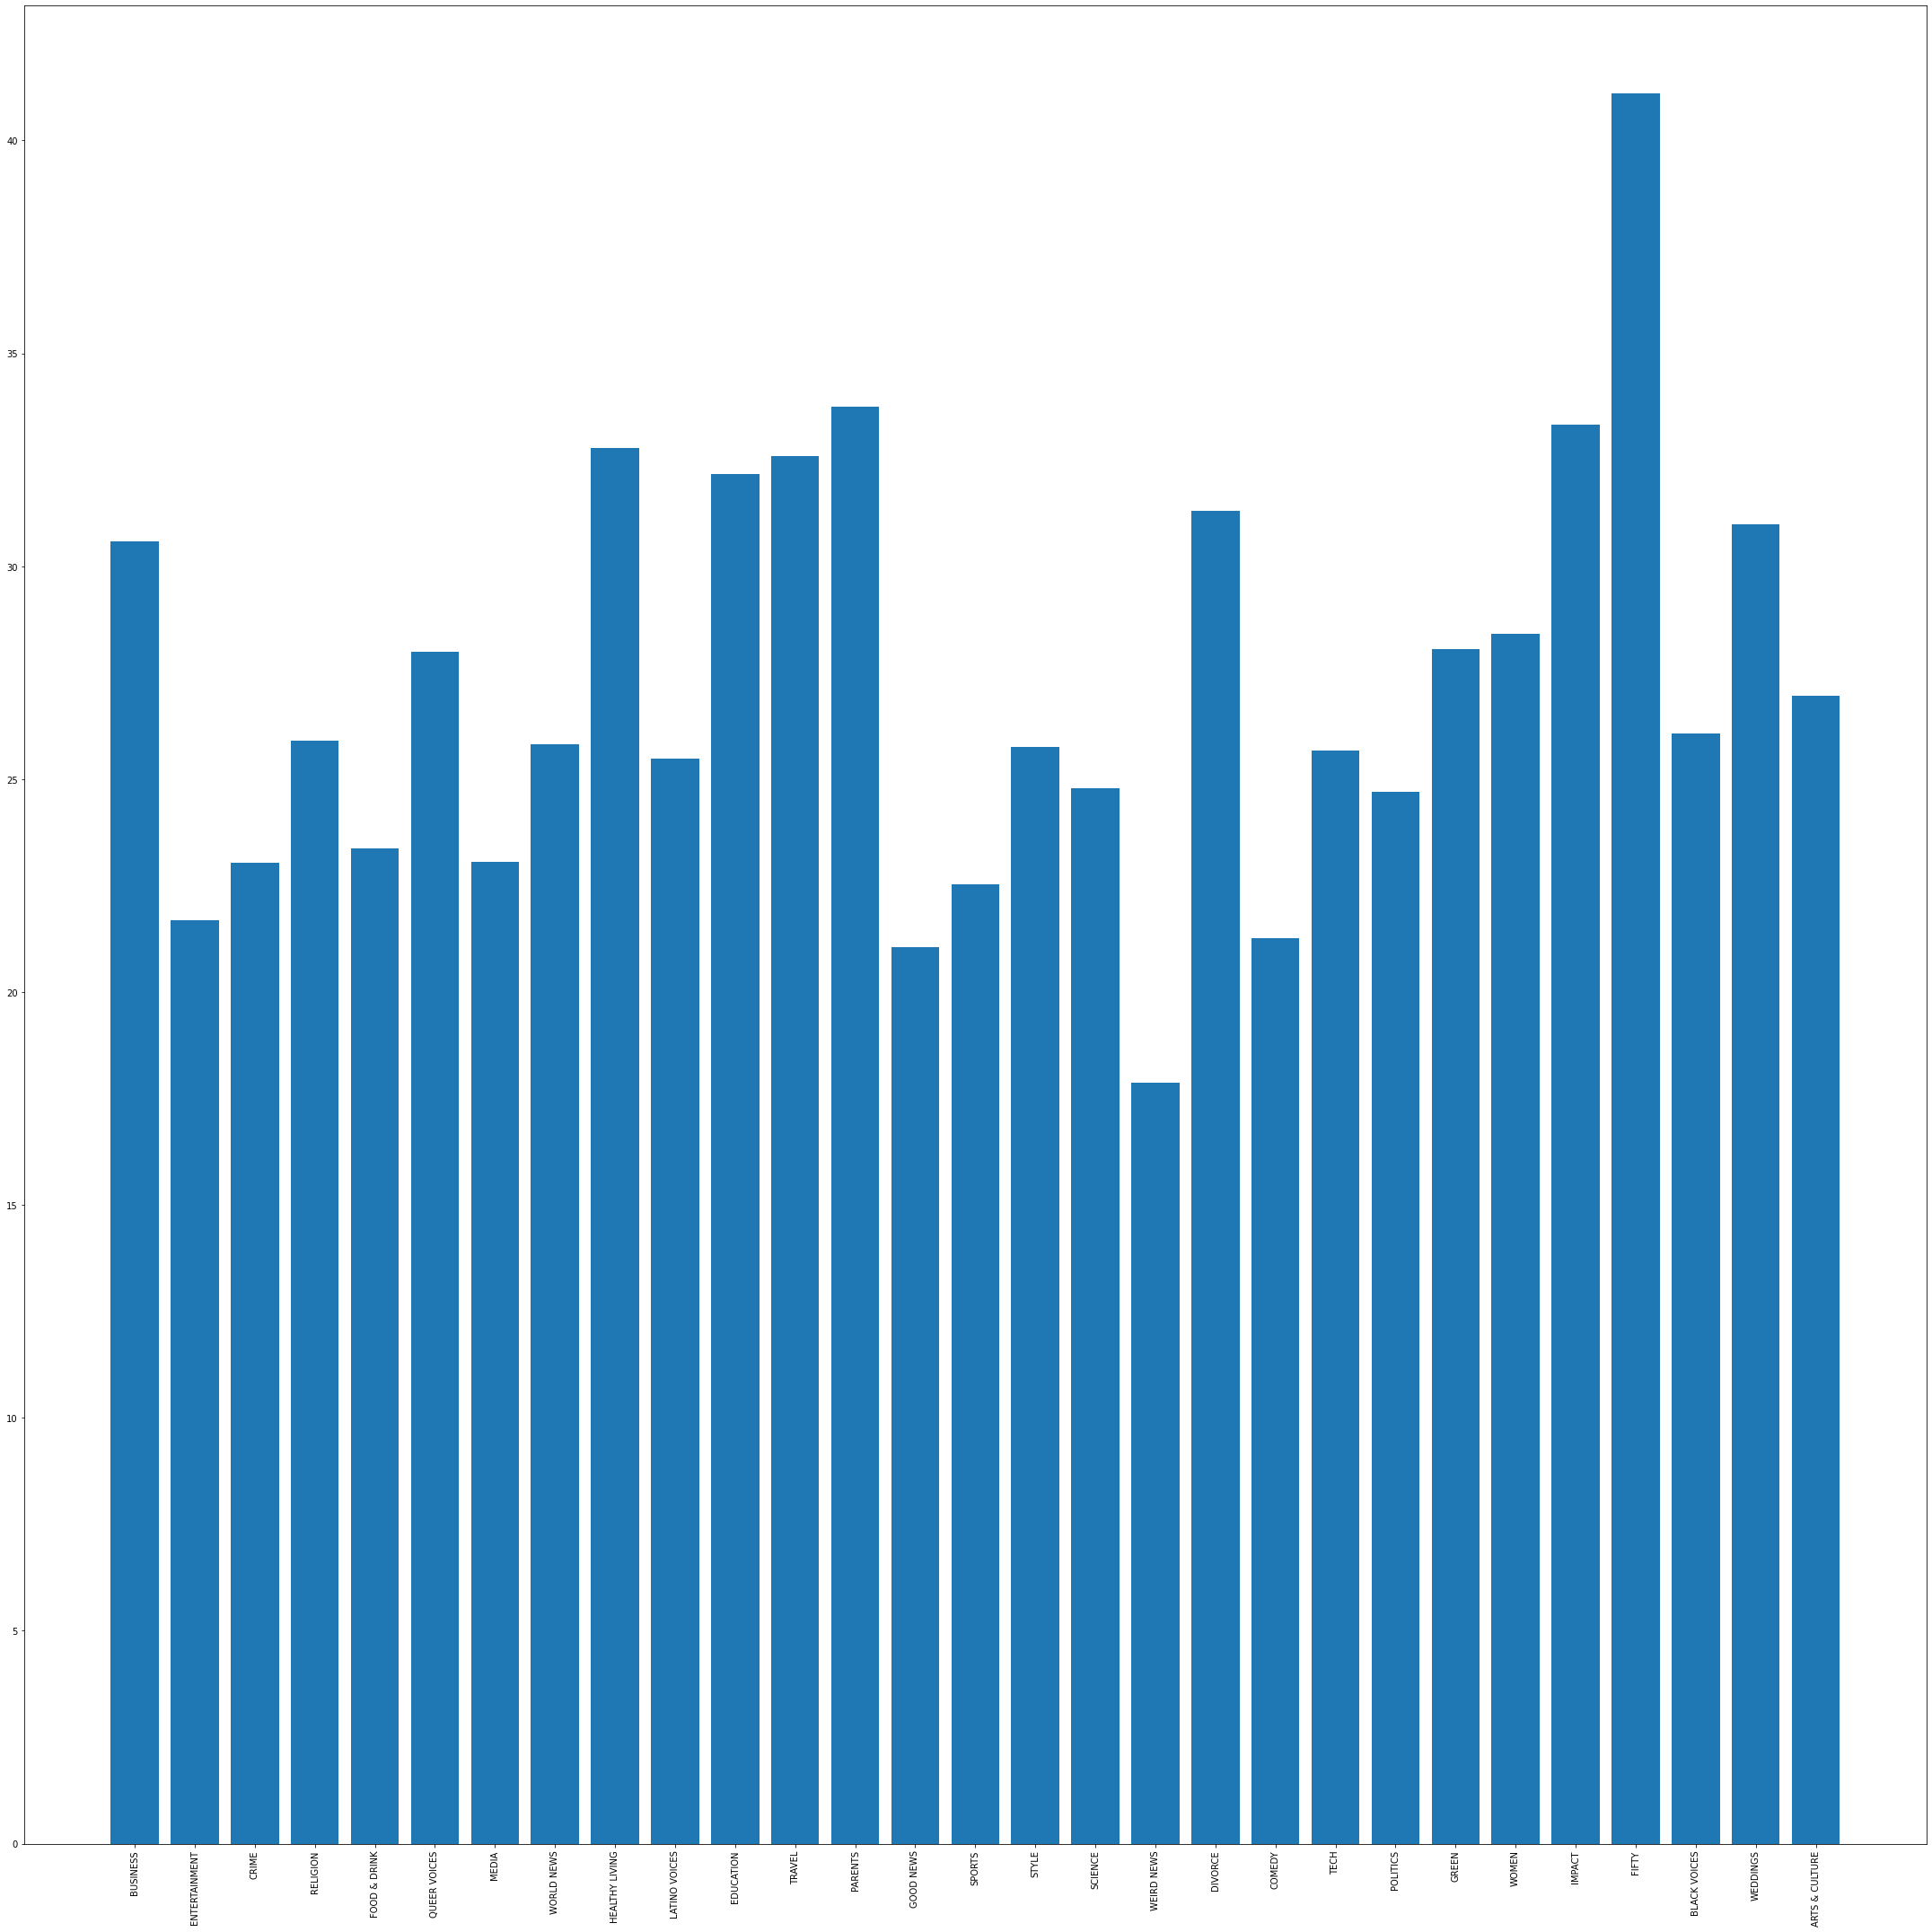

In [22]:
import random
import matplotlib
import matplotlib.pyplot as plt 

path = os.getcwd()
folder = "figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [23]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:0
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [24]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    if len(sentences.split(" ")) >= 10:
    
        list_of_sentences.append(sentences)
        labels.append(label)
    '''for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)'''
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



187725


In [29]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [30]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [31]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [32]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

150180
150180
37545


In [33]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [34]:
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [35]:
from sklearn.metrics import f1_score
import numpy as np

y_pred = np.array([ 4, 13,  6, 13,  5,  2,  2,  6,  6,  6,  2,  6,  6,  2,  2,  6])
y_true = np.array([27, 21,  4, 21,  8, 12,  0,  8,  8, 6,  7,  8, 21, 12, 21, 11])

print(f1_score(y_true, y_pred, average="macro"))


0.020833333333333332


In [36]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from torch.nn import functional as F
import torch.nn
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 29)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

num_of_items_per_class = [7645, 16059, 3406, 2557, 8323, 6315, 2816, 8421, 28717, 1130, 2149, 9888, 12633, 1399, 4885, 11904, 2179, 2671, 3427, 5176, 2083, 32740, 3946, 3491, 3460, 1402, 4529, 3652, 3879]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0

'''path = os.getcwd()

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

checkpoint = torch.load(path_save)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']'''


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

'path = os.getcwd()\n\nfolder = "bert_model1"\nFILE = "model1.pth"\n\npath_save = os.path.join(path, folder)\npath_save = os.path.join(path_save, FILE)\n\ncheckpoint = torch.load(path_save)\nmodel.load_state_dict(checkpoint[\'model_state_dict\'])\noptimizer.load_state_dict(checkpoint[\'optimizer_state_dict\'])\nepoch = checkpoint[\'epoch\']\nloss = checkpoint[\'loss\']'

In [37]:

f1_score_macro = []
f1_score_raw = []


for epoch in tqdm(range(10)):
    
    model.train()
    
    pred_temp = 0
    true_temp = 0
    y_true = []
    y_pred = []
    
    
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = F.cross_entropy(outputs.logits, labels, class_weights)
        accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
        
        running_acc += accuracy.item()
        running_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
            
    
    print("train_loss for epoch = {epoch}".format(epoch = epoch + 1 ), "is", running_loss/len(train_loader))
    train_losses.append(running_loss/len(train_loader))
    running_loss = 0
    
    print("train_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(train_texts))
    train_acc.append(running_acc/len(train_texts))
    running_acc = 0
    
    
    
    if epoch%1 == 0: 
        model.eval()
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = F.cross_entropy(outputs.logits, labels, class_weights)
            running_loss += loss.item()
            accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
            running_acc += accuracy.item()
            
            #predictions for f1 score
            pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
            true_temp = labels.cpu().detach().numpy()
            
            
            for item in pred_temp:
                y_pred.append(item)
            
            for item in true_temp:
                y_true.append(item)
                
                         
            
    print("val_loss for epoch = {epoch}".format(epoch = epoch + 1), "is", running_loss/len(val_loader))
    val_losses.append(running_loss/len(val_loader))
    running_loss = 0
    print("val_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(val_texts))
    val_acc.append(running_acc/len(val_texts))
    running_acc = 0
    
    f1score = f1_score(y_true, y_pred, average="macro")
    f1score_none = f1_score(y_true, y_pred, average=None)
    
    print("F1 macro score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score)
    print("F1 raw score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score_none)
    
    f1_score_macro.append(f1score)
    f1_score_raw.append(f1score_none)
                            
    
print(y_pred[0:10])
print(y_true[0:10])
    

  0%|          | 0/10 [00:00<?, ?it/s]

train_loss for epoch = 1 is 1.492438488734839
train_acc for epoch = 1 is 0.6119922759355441


 10%|█         | 1/10 [43:15<6:29:17, 2595.31s/it]

val_loss for epoch = 1 is 1.1786596068789414
val_acc for epoch = 1 is 0.6655213743507791
F1 macro score for epoch = 1 is 0.5962948248838665
F1 raw score for epoch = 1 is [0.58276725 0.66322068 0.56628914 0.56148867 0.80269716 0.72551724
 0.52708165 0.719375   0.73384192 0.46068966 0.51980676 0.80420145
 0.73536585 0.40366972 0.72896327 0.80806707 0.5577342  0.42754919
 0.7611276  0.51729323 0.52205221 0.71221129 0.55681206 0.36004785
 0.37849462 0.32907801 0.45581395 0.77820513 0.59308807]
train_loss for epoch = 2 is 1.024115344561669
train_acc for epoch = 2 is 0.6889865494739645


 20%|██        | 2/10 [1:26:32<5:46:10, 2596.26s/it]

val_loss for epoch = 2 is 1.1312178517967577
val_acc for epoch = 2 is 0.6776667998401917
F1 macro score for epoch = 2 is 0.6093144741119467
F1 raw score for epoch = 2 is [0.60250762 0.69874953 0.52754237 0.61458333 0.81530984 0.73935423
 0.49511401 0.73120361 0.73718295 0.44714459 0.54526092 0.81241847
 0.73577067 0.42326333 0.77085427 0.82034976 0.57683215 0.43755869
 0.74847458 0.53564155 0.55942623 0.72809726 0.59502125 0.36805112
 0.40508221 0.35145386 0.47779112 0.78998073 0.5800995 ]
train_loss for epoch = 3 is 0.8037868910322774
train_acc for epoch = 3 is 0.7358769476628046


 30%|███       | 3/10 [2:09:44<5:02:39, 2594.23s/it]

val_loss for epoch = 3 is 1.1442804840628675
val_acc for epoch = 3 is 0.6799307497669463
F1 macro score for epoch = 3 is 0.6174134077236955
F1 raw score for epoch = 3 is [0.59284267 0.70225564 0.61337684 0.57389801 0.82858019 0.71830376
 0.4684466  0.73476005 0.74396449 0.52892562 0.53156823 0.82240957
 0.74640178 0.43518519 0.76586889 0.81894403 0.59275521 0.4904387
 0.75100942 0.52297165 0.49514563 0.72181623 0.60051216 0.36536431
 0.41196938 0.40242057 0.49451032 0.81476418 0.61557948]
train_loss for epoch = 4 is 0.6197294673165207
train_acc for epoch = 4 is 0.7787654814222933


 40%|████      | 4/10 [2:52:59<4:19:27, 2594.57s/it]

val_loss for epoch = 4 is 1.2094829006030883
val_acc for epoch = 4 is 0.6929551205220402
F1 macro score for epoch = 4 is 0.621286332074693
F1 raw score for epoch = 4 is [0.60957519 0.71985158 0.59634888 0.59594986 0.82806138 0.73451711
 0.52593134 0.73041837 0.75617479 0.44444444 0.54816514 0.82101167
 0.7456     0.4088748  0.78279341 0.83337261 0.59950249 0.47401247
 0.76083916 0.53656174 0.5443669  0.75801696 0.58651399 0.38006231
 0.36987071 0.36390102 0.52472368 0.82154882 0.6162928 ]
train_loss for epoch = 5 is 0.4701685147187136
train_acc for epoch = 5 is 0.8149753628978559


 50%|█████     | 5/10 [3:36:14<3:36:14, 2594.81s/it]

val_loss for epoch = 5 is 1.299548516393622
val_acc for epoch = 5 is 0.6946064722333201
F1 macro score for epoch = 5 is 0.6207592437051277
F1 raw score for epoch = 5 is [0.61105785 0.71469302 0.63141994 0.58881256 0.81993958 0.73924495
 0.54460094 0.73536    0.76473614 0.45849802 0.49021627 0.81863128
 0.73909431 0.41801802 0.77541899 0.82020938 0.55982437 0.44495413
 0.77249451 0.53174224 0.553916   0.75779287 0.60158311 0.37943696
 0.38541033 0.36213992 0.54707113 0.7992278  0.63647343]
train_loss for epoch = 6 is 0.34649310272519956
train_acc for epoch = 6 is 0.848255426821148


 60%|██████    | 6/10 [4:19:25<2:52:53, 2593.48s/it]

val_loss for epoch = 6 is 1.4780486689036865
val_acc for epoch = 6 is 0.7000133173525103
F1 macro score for epoch = 6 is 0.6247407572982722
F1 raw score for epoch = 6 is [0.60461957 0.7328996  0.60297572 0.57654432 0.82986767 0.70785173
 0.54337152 0.72066015 0.77130595 0.51903114 0.54755784 0.82362082
 0.75573867 0.40074212 0.78164732 0.8307835  0.56140351 0.44672131
 0.76170799 0.55647383 0.54788877 0.75255126 0.5755313  0.38503985
 0.40027605 0.40893471 0.5308311  0.82352941 0.61737523]
train_loss for epoch = 7 is 0.2620792654649521
train_acc for epoch = 7 is 0.8734185643893994


 70%|███████   | 7/10 [5:02:35<2:09:36, 2592.27s/it]

val_loss for epoch = 7 is 1.591471464856094
val_acc for epoch = 7 is 0.6993740844320149
F1 macro score for epoch = 7 is 0.622441906563192
F1 raw score for epoch = 7 is [0.62100757 0.70579467 0.59553696 0.58250497 0.827199   0.69850039
 0.54122939 0.73394495 0.77390418 0.53308824 0.54842767 0.8191862
 0.74858371 0.38095238 0.77592692 0.83325656 0.58558559 0.44859813
 0.7657784  0.50574713 0.5630355  0.76394771 0.5709282  0.40029652
 0.39600921 0.40569395 0.53185596 0.78548695 0.60880829]
train_loss for epoch = 8 is 0.20314540334020686
train_acc for epoch = 8 is 0.8938673591689972


 80%|████████  | 8/10 [5:45:47<1:26:24, 2592.24s/it]

val_loss for epoch = 8 is 1.7504741738772185
val_acc for epoch = 8 is 0.7035024637102144
F1 macro score for epoch = 8 is 0.6251009686226232
F1 raw score for epoch = 8 is [0.59675819 0.7101149  0.62558502 0.59921415 0.82033898 0.72177927
 0.56265158 0.73566879 0.77863359 0.50675676 0.5342312  0.81743725
 0.7437166  0.38990826 0.77008929 0.81550802 0.58005249 0.43873979
 0.76353276 0.54494382 0.53763441 0.77804509 0.58906526 0.39265358
 0.38604306 0.42710472 0.53281097 0.81693989 0.61197041]
train_loss for epoch = 9 is 0.1598409408493559
train_acc for epoch = 9 is 0.9115461446264482


 90%|█████████ | 9/10 [6:29:01<43:12, 2592.99s/it]  

val_loss for epoch = 9 is 1.834325796895564
val_acc for epoch = 9 is 0.7016646690637901
F1 macro score for epoch = 9 is 0.6238168725620538
F1 raw score for epoch = 9 is [0.60478608 0.72261839 0.60889224 0.60392968 0.82367448 0.68849962
 0.54992076 0.73337477 0.77548568 0.456      0.53496115 0.83284301
 0.73512476 0.41709402 0.77980666 0.82906184 0.59926017 0.43187661
 0.76363636 0.57004831 0.55690608 0.76723512 0.58823529 0.36307692
 0.38216561 0.40968343 0.53121693 0.8202324  0.61104294]
train_loss for epoch = 10 is 0.12990236278474324
train_acc for epoch = 10 is 0.9240378212811293


100%|██████████| 10/10 [7:12:15<00:00, 2593.57s/it]

val_loss for epoch = 10 is 2.11450135366119
val_acc for epoch = 10 is 0.7137568251431615
F1 macro score for epoch = 10 is 0.6268957369853411
F1 raw score for epoch = 10 is [0.60978148 0.73353194 0.61212564 0.54131054 0.82427709 0.73746046
 0.56333333 0.73157579 0.78399378 0.54008439 0.53684211 0.82633128
 0.74449506 0.41090147 0.78076703 0.82807348 0.58479532 0.43429844
 0.76224273 0.51808973 0.55276382 0.79202231 0.595189   0.40408805
 0.38267148 0.42150538 0.51090343 0.81627119 0.60025063]
[10, 14, 8, 8, 18, 9, 8, 1, 5, 19]
[14, 14, 8, 8, 8, 9, 8, 21, 20, 1]


In [15]:
'''
f1_score_macro = []
f1_score_raw = []


pred_temp = 0
true_temp = 0
y_true = []
y_pred = []
epoch = 10

all_actual_targets = []
all_top_three_preds = []

model.eval()

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs = model(input_ids, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels, class_weights)
    running_loss += loss.item()
    
    #Top three predictions for MRR calculation
    values, indices = torch.topk(outputs.logits , 3)
    
    top_three_preds = indices.cpu().detach().numpy()
    actual_targets = labels.cpu().detach().numpy()
    
    for item1 in top_three_preds:
        all_top_three_preds.append(item1)
        
    for item2 in actual_targets:
        all_actual_targets.append(item2)
    
    accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
    running_acc += accuracy.item()

    #predictions for f1 score
    pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
    true_temp = labels.cpu().detach().numpy()


    for item in pred_temp:
        y_pred.append(item)

    for item in true_temp:
        y_true.append(item)'''
                

In [16]:
ranks = [] 

for value in range(len(all_actual_targets)):
    if all_actual_targets[value] == all_top_three_preds[value][0]:
        ranks.append(1)
    elif all_actual_targets[value] == all_top_three_preds[value][1]:
        ranks.append(2)
    elif all_actual_targets[value] == all_top_three_preds[value][2]:
        ranks.append(3)
    else:
        ranks.append(0)

def meanReciprocalRank(arrayOfRanks):
    _sum = 0
    for i in arrayOfRanks:
        
        if i != 0:
            _sum += 1/i
        else:
            _sum += i
            
    return _sum/len(arrayOfRanks)


def accuracy(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i]:
            count +=1
            
    return count/len(predicted)


def accuracyTop3(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i] or predicted[i][1] == target[i] or predicted[i][2] == target[i]:
            count +=1
            
    return count/len(predicted)
        

In [17]:
print("val_loss for epoch = {epoch}".format(epoch = epoch), "is", running_loss/len(val_loader))
val_losses.append(running_loss/len(val_loader))
running_loss = 0
print("val_acc for epoch = {epoch}".format(epoch = epoch), "is", running_acc/len(val_texts))
val_acc.append(running_acc/len(val_texts))
running_acc = 0



print("Accuracy for top prediction is :", accuracy(all_top_three_preds, all_actual_targets))
print("Accuracy for top 3 predictions is :", accuracyTop3(all_top_three_preds, all_actual_targets))
print("Mean Reciprocal Rank for top 3 predictions is :" , meanReciprocalRank(ranks))


f1score = f1_score(y_true, y_pred, average="macro")
f1score_none = f1_score(y_true, y_pred, average=None)

print("F1 macro score for epoch = {epoch}".format(epoch = epoch), "is", f1score)
print("F1 raw score for epoch = {epoch}".format(epoch = epoch), "is", f1score_none)

f1_score_macro.append(f1score)
f1_score_raw.append(f1score_none)

val_loss for epoch = 10 is 1.9821313853679412
val_acc for epoch = 10 is 0.7104100946372239
Accuracy for top prediction is : 0.7104100946372239
Accuracy for top 3 predictions is : 0.8945110410094638
Mean Reciprocal Rank for top 3 predictions is : 0.7947549947423568
F1 macro score for epoch = 10 is 0.6305909024247816
F1 raw score for epoch = 10 is [0.61083744 0.74032969 0.63434903 0.5857295  0.83367317 0.73363524
 0.59123506 0.71675961 0.78145574 0.54403131 0.53781513 0.81779126
 0.73722926 0.40084388 0.76008273 0.8339719  0.59559676 0.43495531
 0.78808864 0.51413882 0.55114823 0.79005755 0.58802178 0.37310481
 0.40276035 0.42829077 0.5341477  0.8209607  0.60609481]


In [18]:
c_matrix = confusion_matrix(y_true, y_pred, labels=label_values)


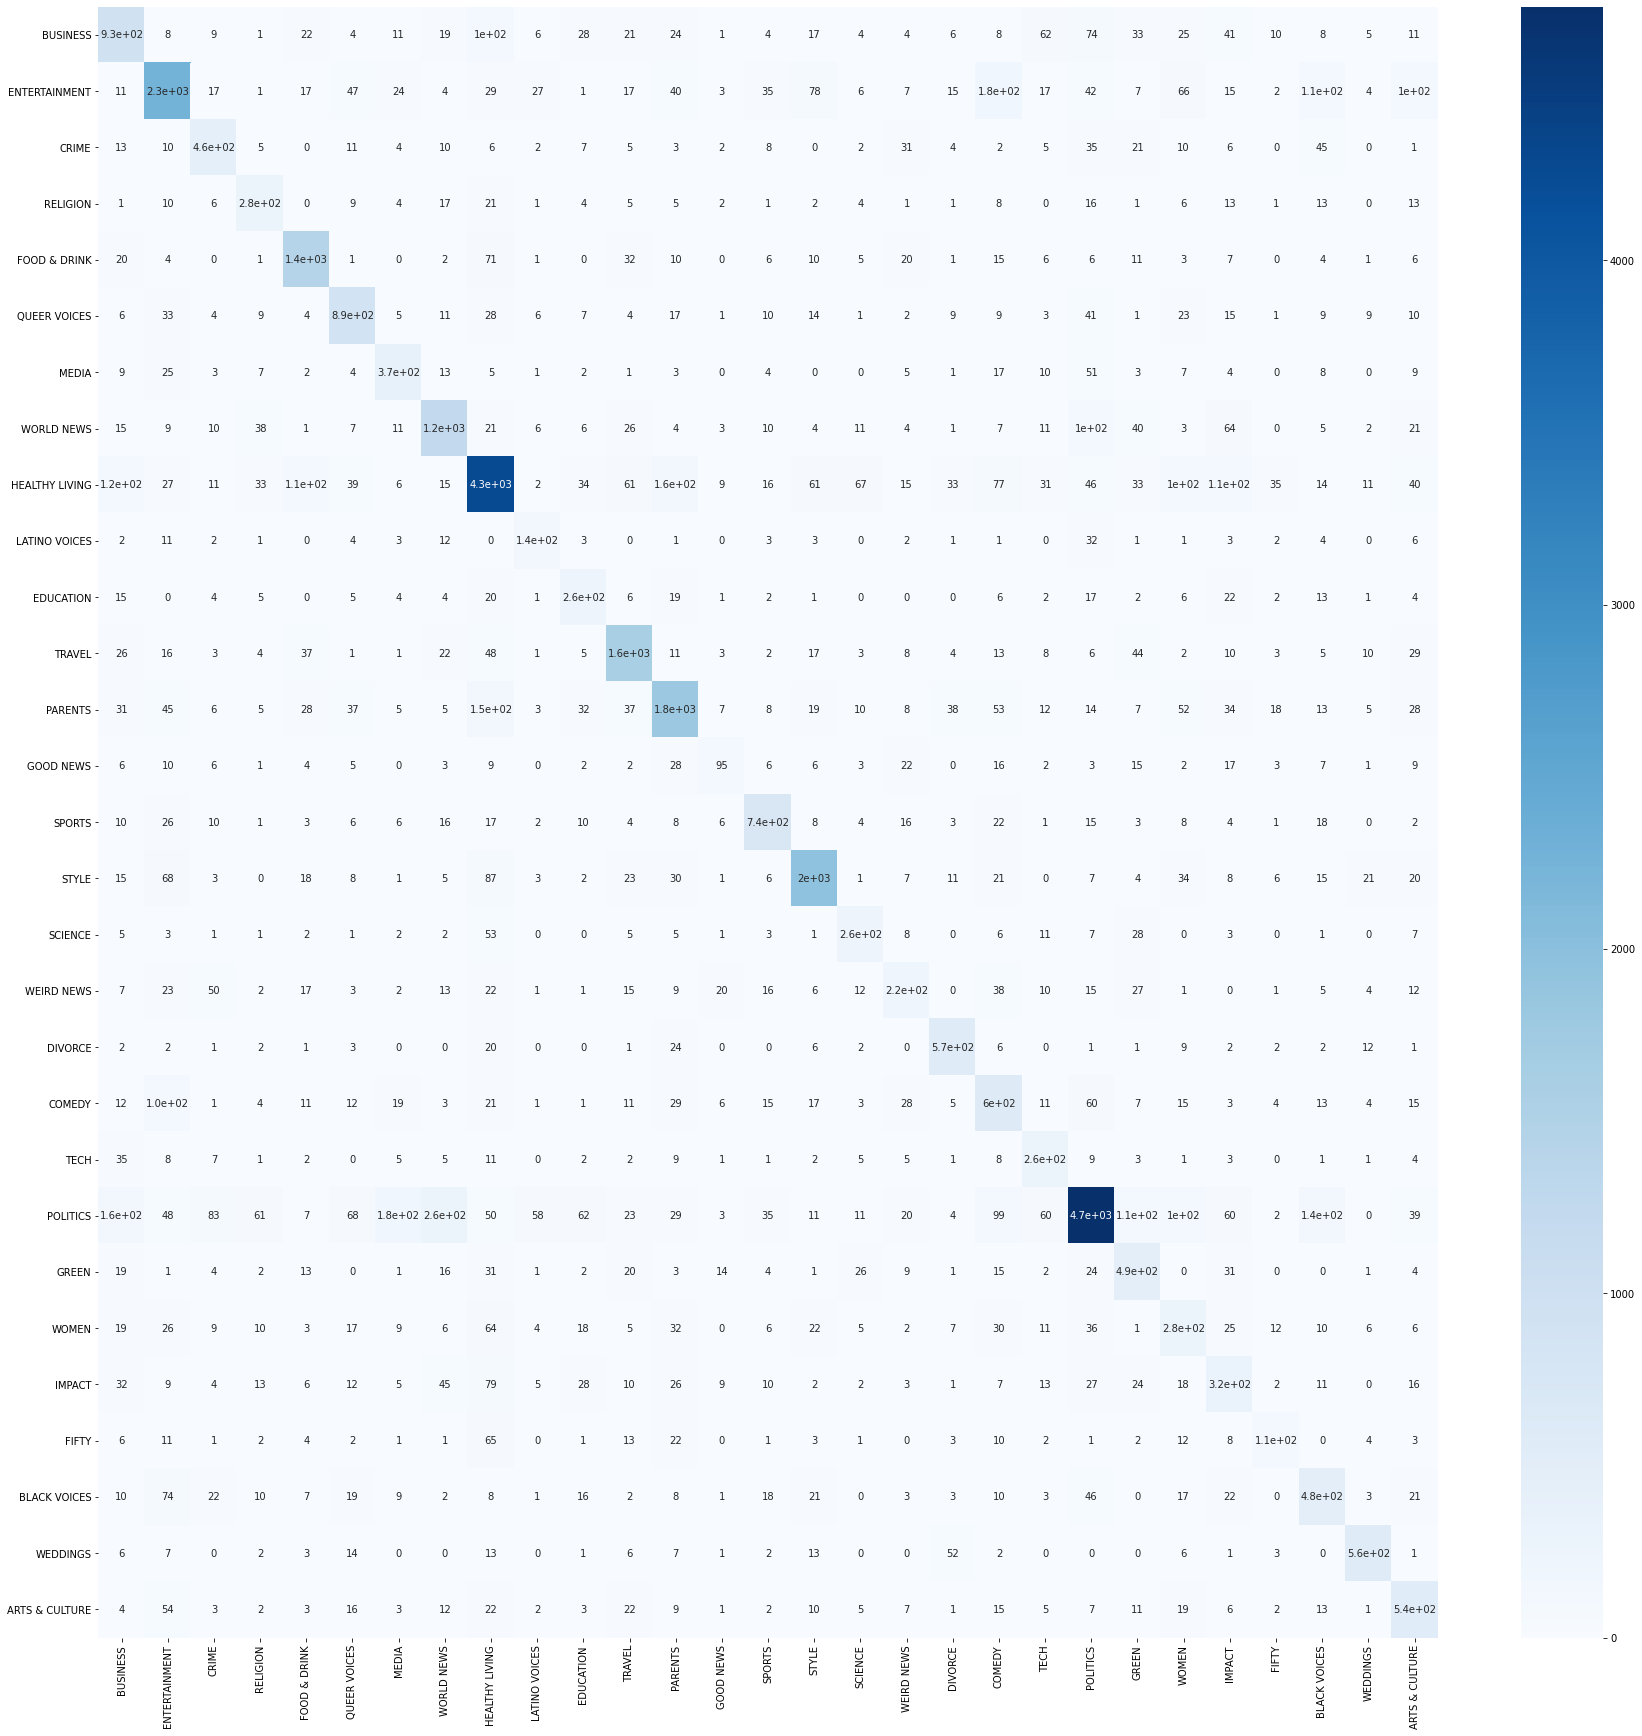

In [19]:
import pandas as pd
import seaborn as sns
from pylab import savefig

df_cm = pd.DataFrame(c_matrix, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_cm, annot=True, cmap='Blues')


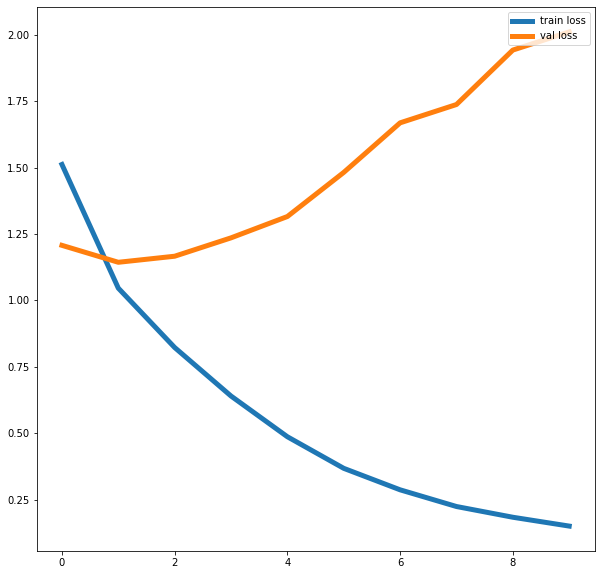

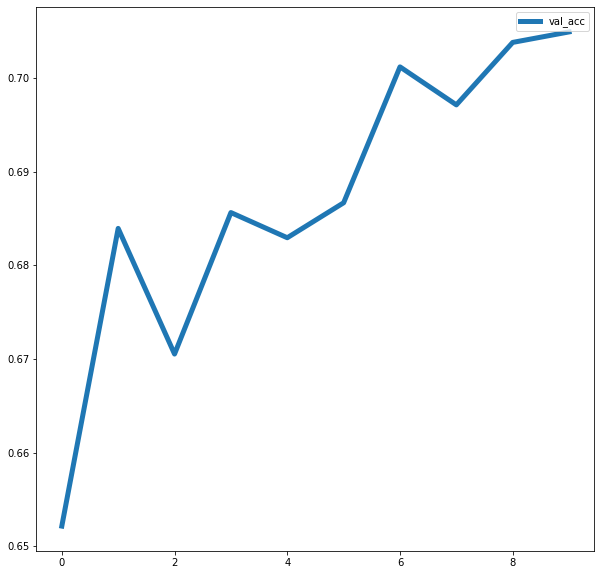

In [117]:
"""import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(10):
    epochs.append(i)

plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "loss-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')

path = os.getcwd()
folder = "figs"
FILE = "acc-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "confusion_matrix_unweighted.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save, dpi=500)

f = open("values.txt",'w')
for i in range(len(epochs)):
    
    f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_losses[i]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_acc[i]) + "\n")
    f.write("F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(f1_score_macro[i]) + "\n")
    f.write("F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(f1_score_raw[i]) + "\n")
    f.write("\n""\n")
f.close()
    
    

In [119]:
import os
import shutil

path = os.getcwd()

shutil.rmtree("bert_model1")
os.mkdir("bert_model1")

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)